In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df = df[['sepal_length','petal_length','species']]

In [5]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [15]:
x = df.iloc[:, 0:2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
lr = LogisticRegression(multi_class='multinomial')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
print(accuracy)
print(confusion_mat)

1.0
    0  1   2
0  10  0   0
1   0  9   0
2   0  0  11


In [21]:
query = np.array([[3.4, 2.7]])
lr.predict_proba(query)

C:\Users\anjal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[8.09242380e-01, 1.90157191e-01, 6.00428887e-04]])

C:\Users\anjal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


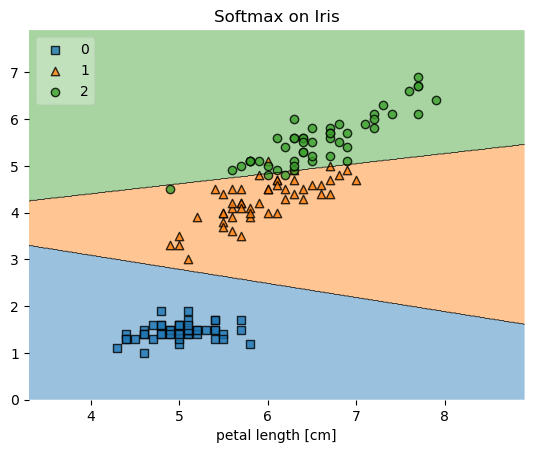

In [23]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.values, y.values, lr, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()